In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [313]:
from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/MyDrive/College/Titanic Problem/train.csv')
test = pd.read_csv('/content/drive/MyDrive/College/Titanic Problem/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [314]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [315]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [316]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [317]:
train.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


1. Drop Cabin, PassengerID, Names, Ticket Price (class dictates price which is included)
2. Complete Age and Embarked
3. Women, Children, upper-class more likely to survive
4. Siblings and Parents affect survival

In [318]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [319]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [320]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [321]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


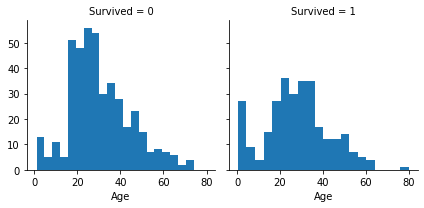

In [322]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

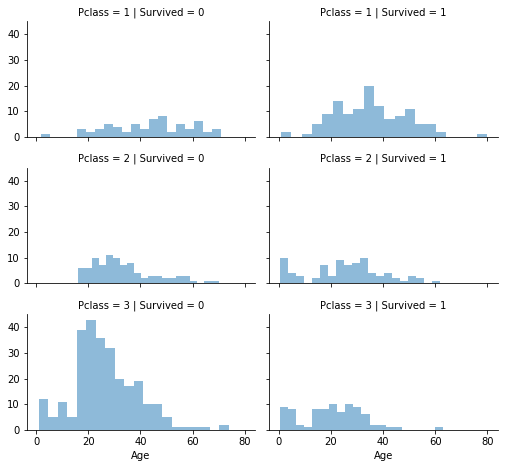

In [323]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [324]:
train = train.drop(['Ticket','Cabin','Name', 'PassengerId','Fare'], axis=1)
test = test.drop(['Ticket', 'Cabin','Name','Fare'], axis=1)
combine = [train, test]

In [325]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,S
1,1,1,1,38.0,1,0,C
2,1,3,1,26.0,0,0,S
3,1,1,1,35.0,1,0,S
4,0,3,0,35.0,0,0,S


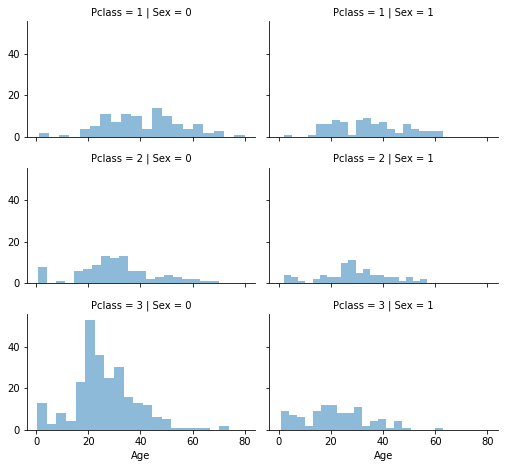

In [326]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [327]:
import random as rnd
import statistics

guess_ages = np.zeros((2,3))
guess_ages

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]   
            guess_df['Age'].dropna()

            # using median 
            #age_guess = guess_df['Age'].median()

            age_guess = statistics.mode(guess_df['Age'])

            #age_mean = guess_df['Age'].mean()
            #age_std = guess_df['Age'].std()
            #age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            #guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            guess_ages[i,j] = age_guess

            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)  

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22,1,0,S
1,1,1,1,38,1,0,C
2,1,3,1,26,0,0,S
3,1,1,1,35,1,0,S
4,0,3,0,35,0,0,S


In [328]:
train['AgeBand'] = pd.cut(train['Age'], 20)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 4.0]",0.675000
1,"(4.0, 8.0]",0.642857
2,"(8.0, 12.0]",0.266667
3,"(12.0, 16.0]",0.483871
4,"(16.0, 20.0]",0.426230
5,"(20.0, 24.0]",0.242268
6,"(24.0, 28.0]",0.348837
7,"(28.0, 32.0]",0.428571
8,"(32.0, 36.0]",0.450450
9,"(36.0, 40.0]",0.369565


In [329]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 8, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 8) & (dataset['Age'] <= 12), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 16), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 20), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 24), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 28), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 32), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 36), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 44), 'Age'] = 8
    dataset.loc[(dataset['Age'] > 44) & (dataset['Age'] <= 48), 'Age'] = 9
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 56), 'Age'] = 10
    dataset.loc[(dataset['Age'] > 56) & (dataset['Age'] <= 64), 'Age'] = 11
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 12
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeBand
0,0,3,0,4,1,0,S,"(20.0, 24.0]"
1,1,1,1,8,1,0,C,"(36.0, 40.0]"
2,1,3,1,5,0,0,S,"(24.0, 28.0]"
3,1,1,1,7,1,0,S,"(32.0, 36.0]"
4,0,3,0,7,0,0,S,"(32.0, 36.0]"


In [330]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [331]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [332]:
train = train.drop(['Parch', 'SibSp', 'FamilySize', 'AgeBand'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize',"PassengerId"], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Embarked,IsAlone
0,0,3,0,4,S,0
1,1,1,1,8,C,0
2,1,3,1,5,S,1
3,1,1,1,7,S,0
4,0,3,0,7,S,1


In [333]:
freq_port = train.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [334]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [335]:
from sklearn.model_selection import train_test_split
y = train["Survived"]
x = train.drop("Survived", axis=1).copy()

X_train, X_test, Y_train, Y_test = train_test_split( x, y, random_state = 0 )

z = test.copy()

In [336]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [337]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_log

80.27

In [338]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc

78.48

In [339]:
# K Nearest Neighbours

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

80.72

In [340]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
acc_gaussian

77.58

In [341]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)
acc_perceptron

75.34

In [342]:
# Linear SVC

linear_svc = LinearSVC(max_iter=6000)
linear_svc.fit(X_train, Y_train)
acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
acc_linear_svc

79.37

In [343]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)
acc_sgd

78.92

In [344]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(z)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

80.27

In [345]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

82.51

In [346]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,82.51
1,KNN,80.72
2,Logistic Regression,80.27
8,Decision Tree,80.27
7,Linear SVC,79.37
6,Stochastic Gradient Decent,78.92
0,Support Vector Machines,78.48
4,Naive Bayes,77.58
5,Perceptron,75.34


In [347]:
copy = pd.read_csv('/content/drive/MyDrive/College/Titanic Problem/test.csv')

submission = pd.DataFrame({
        "PassengerId": copy["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('/content/drive/MyDrive/College/Titanic Problem/submission.csv', index=False)